In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
import os
import numpy as np

In [15]:
train = '15'
ckp = '42497'
tiles = ['tile_0_365']
epoch = '30'
datasets = ['MCD12Q1v6stable_LCType1']

In [35]:
for tile in tiles:
    indir = os.path.join(r'E:\acocac\research\c4',tile,'post\pngs')
    
    outdir = os.path.join(r'E:\acocac\research\c4',tile,'post','thesis')

    if not os.path.exists(outdir):
        os.makedirs(outdir)
    
    for dataset in datasets:

        aoi = mpimg.imread(os.path.join(indir,'map_aoi_' + tile + '.png')) 

        suffix = 'convgru64_' + train + '_fold0_' + dataset + '_' + ckp
        pre = mpimg.imread(os.path.join(indir,'map_preHMM_convgru64_' + train + '_fold0_' + dataset + '_' + ckp + '.png'))
        post = mpimg.imread(os.path.join(indir,'map_postHMM_convgru64_' + train + '_fold0_' + dataset + '_' + ckp + '.png')) 
        legend = mpimg.imread(os.path.join(indir,'legend_' + suffix + '.png'))

        if 500 <= legend.shape[1] <= 1200:
            hspace_legend = 0.01
        elif 1200 <= legend.shape[1] <= 2000:
            hspace_legend = 0.05  
        elif 2000 <= legend.shape[1] <= 2200:
            hspace_legend = 0.08
        elif 2200 <= legend.shape[1] <= 2500:
            hspace_legend = 0.1
        elif legend.shape[1] > 2500:
            hspace_legend = 0.07

        gs0 = gridspec.GridSpec(5, 2,  hspace=0.1, wspace=0, width_ratios = [0.2, 1.2], height_ratios = [0.4, hspace_legend,1,1,0.01])
        arrays_l1 = [aoi,legend,pre,post]

        fig = plt.figure(figsize=(16, 12), constrained_layout=False)

        for i, arr in enumerate(arrays_l1):
            if i == 0:
                ax00 = fig.add_subplot(gs0[0, 0])
            elif i == 1:
                ax00 = fig.add_subplot(gs0[0, 1])
            else:
                ax00 = fig.add_subplot(gs0[i, :])
            ax00.imshow(arr)
            ax00.axis('off')

        fig.savefig(os.path.join(outdir,tile + '_' + dataset + '.png'), bbox_inches='tight',pad_inches = 0, dpi=150)
        plt.close()

        del legend

In [4]:
import rasterio
import matplotlib 
import matplotlib.pyplot as plt
from collections import Counter

In [5]:
def read_file(file):
    with rasterio.open(file) as src:
        return (src.read(1))

def bin_terra(arr):
    arr[arr <= 1] = 0   
    arr[arr == 2018] = 0   
    arr[arr != 0] = 1
    return(arr)

In [9]:
indir = os.path.join(r'E:\acocac\research\c4',tile,'post\pngs')
outdir = os.path.join(r'E:\acocac\research\c4',tile,'post','thesis')

terra_raw = bin_terra(read_file(os.path.join(outdir, 'terrai_raw.asc')))
water = read_file(os.path.join(outdir, 'watermask.asc'))
terra_water = bin_terra(read_file(os.path.join(outdir, 'terrai_water.asc')))
terra_clump = bin_terra(read_file(os.path.join(outdir, 'terrai_clumped.asc')))

In [10]:
colormap_terra = matplotlib.colors.LinearSegmentedColormap.from_list(range(2), ['#ababab','#fa0000'])
colormap_water = matplotlib.colors.LinearSegmentedColormap.from_list(range(2), ['#0032c8','#ababab'])

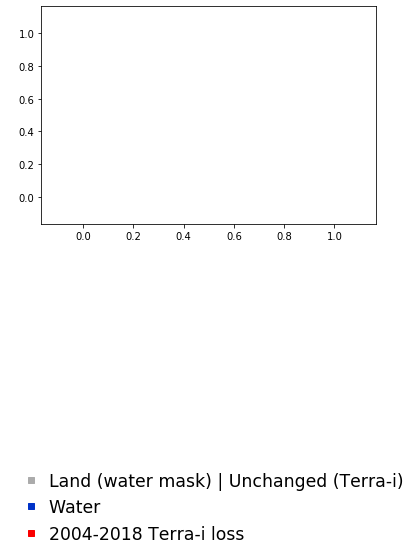

In [36]:
colors = ['#ababab','#0032c8','#fa0000']
labels = ['Land (water mask) | Unchanged (Terra-i)','Water','2004-2018 Terra-i loss']

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors[i]) for i in range(len(colors))]
# legend = plt.legend(handles, labels, loc=5, framealpha=1, frameon=False)
legend = plt.legend(bbox_to_anchor=(0.5, -1.5), handletextpad=0.001, frameon=False, loc='lower center', borderaxespad=0., labels = labels, ncol=1, fontsize='xx-large')

def export_legend(legend, filename=os.path.join(outdir,"legend_terrai.png"), expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.show()

In [37]:
train = '15'
ckp = '42497'
tiles = ['tile_0_630']
epoch = '30'
datasets = ['mapbiomas','Copernicusnew_cf2others','MCD12Q1v6stable_LCProp2']

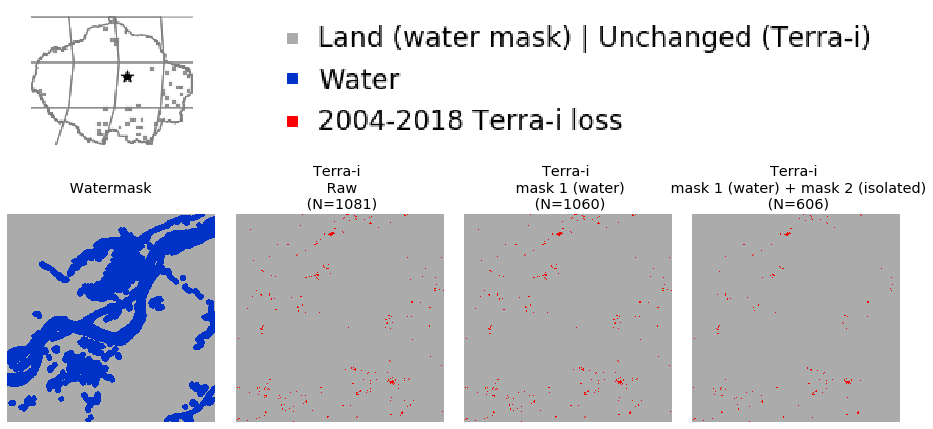

In [38]:
aoi = mpimg.imread(os.path.join(indir,'map_aoi_' + tile + '.png')) 
legend = mpimg.imread(os.path.join(outdir,'legend_terrai.png'))

gs0 = gridspec.GridSpec(2, 4,  hspace=0.2, wspace=0.1, height_ratios= [0.6, 1])
arrays_l1 = [aoi,legend, water,terra_raw,terra_water,terra_clump]

fig = plt.figure(figsize=(16, 8), constrained_layout=False)
for i, arr in enumerate(arrays_l1):
    if i == 0:
        ax00 = fig.add_subplot(gs0[0, 0])
        ax00.imshow(arr)
    elif i == 1:
        ax00 = fig.add_subplot(gs0[0, 1:])
        ax00.imshow(arr)
    elif i == 2:
        ax00 = fig.add_subplot(gs0[1, i-2])
        ax00.set_title('\n Watermask \n', fontsize='x-large')
        ax00.imshow(arr, cmap=colormap_water, interpolation='none', vmin=0, vmax=1)
    else:
        if i == 3:
            trat = '\n Raw'
        elif i == 4:
            trat = '\n mask 1 (water)'
        elif i == 5:
            trat = '\n mask 1 (water) + mask 2 (isolated)'
        N = Counter(arr.flatten())[1.0]
        ax00 = fig.add_subplot(gs0[1, i-2])
        ax00.set_title('Terra-i ' + trat + '\n (N=' + str(N) + ')', fontsize='x-large')
        ax00.imshow(arr, cmap=colormap_terra, interpolation='none', vmin=0, vmax=1)
    ax00.axis('off')
    
plt.show()

fig.savefig(os.path.join(outdir,'terrai_preprocessed.png'), bbox_inches='tight',pad_inches = 0, dpi=150)
plt.close()